In [1]:
!nvidia-smi

Sun Aug 25 15:23:31 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   37C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [2]:
!pip install -q git+https://github.com/THU-MIG/yolov10.git

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


In [3]:
!pip install -q supervision roboflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.7/135.7 kB 10.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.8/79.8 kB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 5.6 MB/s eta 0:00:00


In [4]:
!pip install --upgrade ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.3/41.3 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 869.4/869.4 kB 32.8 MB/s eta 0:00:00
  Attempting uninstall: ultralytics
    Found existing installation: ultralytics 8.1.34
    Uninstalling ultralytics-8.1.34:
      Successfully uninstalled ultralytics-8.1.34


## Download dataset from Roboflow Universe

In [5]:
!pip install -q roboflow

from google.colab import userdata
from roboflow import Roboflow

# SET UP  ROBOFLOW ACCOUNT TO GET API KEY DATASET

rf = Roboflow(api_key="U8tJYgb1VcARmHwyBoOx")
project = rf.workspace("fruit-detection-w707e").project("fruit-detection-deqvb")
version = project.version(1)
dataset = version.download("yolov9")


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to FRUIT-DETECTION-1 in yolov9:: 100%|██████████| 2122/2122 [00:00<00:00, 2883.76it/s]


In [6]:
!sed -i '$d' {dataset.location}/data.yaml
!sed -i '$d' {dataset.location}/data.yaml
!sed -i '$d' {dataset.location}/data.yaml
!sed -i '$d' {dataset.location}/data.yaml
!echo -e "test: ../test/images\ntrain: ../train/images\nval: ../valid/images" >> {dataset.location}/data.yaml

## Custom Training

In [7]:
from ultralytics import YOLO

# Load a model
model = YOLO('yolov10s.pt')  # load a pretrained model (recommended for training)

# Train the model
dataset_path = dataset.location + '/data.yaml'
results = model.train(data = dataset_path, epochs=100, batch=32,imgsz=640, plots=True)

100%|██████████| 15.9M/15.9M [00:00<00:00, 114MB/s] 


Ultralytics YOLOv8.2.81 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov10s.pt, data=/content/FRUIT-DETECTION-1/data.yaml, epochs=100, time=None, patience=100, batch=32, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf

100%|██████████| 755k/755k [00:00<00:00, 40.4MB/s]


Overriding model.yaml nc=80 with nc=5

                   from  n    params  module                                       arguments                     
  0                  -1  1       928  ultralytics.nn.modules.conv.Conv             [3, 32, 3, 2]                 
  1                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  2                  -1  1     29056  ultralytics.nn.modules.block.C2f             [64, 64, 1, True]             
  3                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  4                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  5                  -1  1     36096  ultralytics.nn.modules.block.SCDown          [128, 256, 3, 2]              
  6                  -1  2    788480  ultralytics.nn.modules.block.C2f             [256, 256, 2, True]           
  7                  -1  1    137728  ultralytics

100%|██████████| 6.25M/6.25M [00:00<00:00, 178MB/s]


AMP: checks passed ✅


train: Scanning /content/FRUIT-DETECTION-1/train/labels... 980 images, 0 backgrounds, 0 corrupt: 100%|██████████| 980/980 [00:00<00:00, 2000.17it/s]


train: New cache created: /content/FRUIT-DETECTION-1/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
val: Scanning /content/FRUIT-DETECTION-1/valid/labels... 35 images, 0 backgrounds, 0 corrupt: 100%|██████████| 35/35 [00:00<00:00, 1026.87it/s]

val: New cache created: /content/FRUIT-DETECTION-1/valid/labels.cache


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001111, momentum=0.9) with parameter groups 99 weight(decay=0.0), 112 weight(decay=0.0005), 111 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100        11G      2.937      7.286      3.222        204        640: 100%|██████████| 31/31 [00:30<00:00,  1.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.51s/it]

                   all         35        130      0.679      0.445      0.541      0.297



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      11.1G      2.907      3.518      3.031        144        640: 100%|██████████| 31/31 [00:23<00:00,  1.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.03it/s]

                   all         35        130      0.307      0.254      0.233      0.101



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      10.5G       2.95      3.221      3.053        202        640: 100%|██████████| 31/31 [00:23<00:00,  1.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.23it/s]

                   all         35        130      0.352     0.0359     0.0544      0.024



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      11.2G      3.057      3.054      3.109        136        640: 100%|██████████| 31/31 [00:22<00:00,  1.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.13it/s]

                   all         35        130      0.308      0.145      0.144     0.0628



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      11.4G      2.925      2.853      3.044        207        640: 100%|██████████| 31/31 [00:23<00:00,  1.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.16it/s]

                   all         35        130      0.451      0.261      0.224      0.115



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      12.5G      2.964      2.829       3.03        200        640: 100%|██████████| 31/31 [00:22<00:00,  1.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.53it/s]

                   all         35        130      0.248      0.371      0.205       0.11



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      11.1G      2.865      2.666      2.977        133        640: 100%|██████████| 31/31 [00:22<00:00,  1.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.48it/s]

                   all         35        130      0.451      0.418      0.408      0.218



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      11.3G      2.845      2.557      2.985        183        640: 100%|██████████| 31/31 [00:23<00:00,  1.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.73it/s]

                   all         35        130      0.687      0.524      0.598      0.337



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      11.9G      2.854      2.612      2.958        146        640: 100%|██████████| 31/31 [00:22<00:00,  1.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.77it/s]

                   all         35        130      0.618      0.356      0.416      0.236



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100        11G      2.802       2.47        2.9        169        640: 100%|██████████| 31/31 [00:23<00:00,  1.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.93it/s]

                   all         35        130      0.572      0.498      0.527      0.264



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      11.4G      2.695      2.367      2.862        134        640: 100%|██████████| 31/31 [00:22<00:00,  1.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.04it/s]

                   all         35        130      0.792      0.543      0.624      0.354



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      11.6G      2.742      2.284      2.882        166        640: 100%|██████████| 31/31 [00:24<00:00,  1.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.48it/s]

                   all         35        130      0.822      0.658      0.757      0.428



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      11.2G      2.702      2.306      2.887        123        640: 100%|██████████| 31/31 [00:22<00:00,  1.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.27it/s]

                   all         35        130      0.787      0.445      0.518      0.289



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100        12G      2.693      2.297      2.845        217        640: 100%|██████████| 31/31 [00:23<00:00,  1.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.12it/s]

                   all         35        130      0.778      0.662      0.735      0.438



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      11.2G       2.63      2.189      2.846        202        640: 100%|██████████| 31/31 [00:22<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.86it/s]

                   all         35        130      0.852      0.606      0.741      0.471



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      11.5G      2.619      2.096      2.826        165        640: 100%|██████████| 31/31 [00:23<00:00,  1.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.08it/s]

                   all         35        130      0.799      0.656      0.775      0.477



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      11.1G      2.614      2.046      2.825        150        640: 100%|██████████| 31/31 [00:22<00:00,  1.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.14it/s]

                   all         35        130        0.7      0.568      0.616      0.374



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      11.2G       2.59      2.053      2.765        130        640: 100%|██████████| 31/31 [00:23<00:00,  1.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.24it/s]

                   all         35        130      0.675      0.639      0.662      0.398



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      11.4G      2.526      1.991      2.759        212        640: 100%|██████████| 31/31 [00:22<00:00,  1.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.18it/s]

                   all         35        130      0.771       0.68      0.731      0.465



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      10.9G        2.5      1.925      2.734        162        640: 100%|██████████| 31/31 [00:22<00:00,  1.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.39it/s]

                   all         35        130      0.755      0.713      0.765      0.471



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      11.4G      2.493      1.891      2.714        157        640: 100%|██████████| 31/31 [00:23<00:00,  1.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.21it/s]

                   all         35        130      0.803      0.726      0.807      0.463



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      11.1G      2.469      1.898      2.728        151        640: 100%|██████████| 31/31 [00:22<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.80it/s]

                   all         35        130      0.849      0.714       0.81       0.47



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      11.5G      2.399      1.834      2.679        149        640: 100%|██████████| 31/31 [00:23<00:00,  1.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.72it/s]

                   all         35        130      0.889      0.614      0.744      0.481



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      11.1G      2.371      1.762      2.674        121        640: 100%|██████████| 31/31 [00:22<00:00,  1.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.86it/s]

                   all         35        130      0.825      0.556      0.667      0.437



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100        11G        2.4      1.713      2.648        216        640: 100%|██████████| 31/31 [00:23<00:00,  1.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.05it/s]

                   all         35        130      0.846      0.536      0.699       0.47



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      11.2G      2.332      1.721      2.608        202        640: 100%|██████████| 31/31 [00:22<00:00,  1.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.16it/s]

                   all         35        130       0.79      0.679      0.734      0.507



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      11.8G      2.316      1.672      2.601        167        640: 100%|██████████| 31/31 [00:23<00:00,  1.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.72it/s]

                   all         35        130      0.795      0.706      0.767      0.487



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100        12G       2.31       1.66      2.633        168        640: 100%|██████████| 31/31 [00:22<00:00,  1.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.20it/s]

                   all         35        130      0.867      0.731       0.81      0.543



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      10.7G      2.318      1.665      2.617        120        640: 100%|██████████| 31/31 [00:23<00:00,  1.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.74it/s]

                   all         35        130      0.789      0.726      0.793      0.519



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      11.3G      2.225      1.517      2.554        156        640: 100%|██████████| 31/31 [00:22<00:00,  1.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.96it/s]

                   all         35        130      0.835      0.664      0.773      0.552



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      11.4G      2.231       1.57      2.576        185        640: 100%|██████████| 31/31 [00:23<00:00,  1.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.16it/s]

                   all         35        130      0.697      0.672      0.734       0.53



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      11.9G      2.189      1.509      2.538        110        640: 100%|██████████| 31/31 [00:22<00:00,  1.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.98it/s]

                   all         35        130      0.851      0.724      0.813      0.558



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      11.9G      2.174      1.558       2.54        249        640: 100%|██████████| 31/31 [00:23<00:00,  1.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.34it/s]

                   all         35        130      0.793      0.664      0.753       0.46



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100        11G      2.081      1.462      2.524        165        640: 100%|██████████| 31/31 [00:23<00:00,  1.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.26it/s]

                   all         35        130      0.855      0.596      0.717      0.496



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      11.5G      2.108      1.476      2.496        167        640: 100%|██████████| 31/31 [00:22<00:00,  1.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.28it/s]

                   all         35        130      0.838      0.699      0.772      0.532



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      11.4G      2.138        1.5      2.503        150        640: 100%|██████████| 31/31 [00:23<00:00,  1.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.18it/s]

                   all         35        130      0.901      0.704      0.826      0.539



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      10.7G      2.115      1.483      2.492        129        640: 100%|██████████| 31/31 [00:23<00:00,  1.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.52it/s]

                   all         35        130      0.784      0.704      0.744      0.539



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      11.7G      2.062      1.401      2.471        188        640: 100%|██████████| 31/31 [00:23<00:00,  1.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.07it/s]

                   all         35        130       0.87      0.635      0.783      0.532



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100        11G      2.095      1.424      2.477        180        640: 100%|██████████| 31/31 [00:22<00:00,  1.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.47it/s]

                   all         35        130      0.873      0.656      0.781      0.503



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      11.8G      2.031      1.378      2.441        209        640: 100%|██████████| 31/31 [00:23<00:00,  1.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.25it/s]

                   all         35        130      0.827      0.741      0.824      0.556



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      10.9G      2.039      1.368      2.467        206        640: 100%|██████████| 31/31 [00:23<00:00,  1.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.69it/s]

                   all         35        130      0.872       0.79      0.863      0.578



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      11.6G      1.971      1.309      2.418        166        640: 100%|██████████| 31/31 [00:24<00:00,  1.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.96it/s]

                   all         35        130      0.857      0.718      0.862      0.567



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      11.6G      1.933      1.282      2.404        146        640: 100%|██████████| 31/31 [00:22<00:00,  1.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.78it/s]

                   all         35        130        0.8      0.732       0.83      0.589



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      11.5G      1.927      1.282      2.389        133        640: 100%|██████████| 31/31 [00:24<00:00,  1.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.74it/s]

                   all         35        130      0.751      0.763      0.814      0.547



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      11.5G      1.922      1.274      2.387        146        640: 100%|██████████| 31/31 [00:22<00:00,  1.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.97it/s]

                   all         35        130      0.818      0.739      0.842      0.564



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100      11.3G      1.881      1.248      2.354        161        640: 100%|██████████| 31/31 [00:24<00:00,  1.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.20it/s]

                   all         35        130      0.889      0.718      0.829      0.585



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100      11.9G      1.881      1.278      2.367        172        640: 100%|██████████| 31/31 [00:22<00:00,  1.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.37it/s]

                   all         35        130      0.854      0.735      0.814      0.556



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100      11.1G      1.882      1.246       2.37        171        640: 100%|██████████| 31/31 [00:24<00:00,  1.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.10it/s]

                   all         35        130      0.912      0.609      0.788      0.533



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      11.5G      1.836      1.229       2.35        153        640: 100%|██████████| 31/31 [00:22<00:00,  1.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.19it/s]

                   all         35        130      0.858      0.767      0.855      0.597



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100        12G      1.839      1.236      2.365        168        640: 100%|██████████| 31/31 [00:23<00:00,  1.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.41it/s]

                   all         35        130      0.856      0.637      0.789      0.554



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      11.8G      1.814      1.187      2.314        125        640: 100%|██████████| 31/31 [00:23<00:00,  1.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.15it/s]

                   all         35        130      0.922      0.698      0.828      0.579



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100      11.4G       1.77       1.16      2.289        154        640: 100%|██████████| 31/31 [00:23<00:00,  1.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.47it/s]

                   all         35        130      0.844      0.723      0.839      0.581



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      10.5G      1.741      1.151      2.291        211        640: 100%|██████████| 31/31 [00:23<00:00,  1.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.14it/s]

                   all         35        130      0.762      0.799      0.834      0.556



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      11.6G      1.742      1.144      2.309        120        640: 100%|██████████| 31/31 [00:22<00:00,  1.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.01it/s]

                   all         35        130      0.876      0.663      0.817      0.569



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      10.4G      1.736      1.148      2.266        164        640: 100%|██████████| 31/31 [00:23<00:00,  1.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.60it/s]

                   all         35        130      0.858      0.649      0.812      0.571



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      11.6G      1.748      1.123      2.283        145        640: 100%|██████████| 31/31 [00:22<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.75it/s]

                   all         35        130      0.899      0.671      0.777      0.555



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      11.5G      1.668      1.058      2.245        152        640: 100%|██████████| 31/31 [00:23<00:00,  1.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.80it/s]

                   all         35        130      0.809      0.631      0.742      0.545



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100      10.6G      1.685      1.066      2.261        171        640: 100%|██████████| 31/31 [00:22<00:00,  1.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.04it/s]

                   all         35        130      0.845       0.72      0.818      0.566



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100      11.4G       1.65      1.054      2.231        133        640: 100%|██████████| 31/31 [00:24<00:00,  1.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.74it/s]

                   all         35        130       0.86      0.628      0.777      0.537



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      11.6G      1.692      1.111      2.269        219        640: 100%|██████████| 31/31 [00:23<00:00,  1.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.18it/s]

                   all         35        130      0.918      0.694      0.841       0.61



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100      10.6G      1.668      1.041      2.227        189        640: 100%|██████████| 31/31 [00:24<00:00,  1.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.54it/s]

                   all         35        130      0.863      0.667      0.812      0.575



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      11.6G      1.633      1.012      2.225        141        640: 100%|██████████| 31/31 [00:22<00:00,  1.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.20it/s]

                   all         35        130      0.877      0.634      0.815      0.583



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100      11.4G      1.605       1.01      2.196        128        640: 100%|██████████| 31/31 [00:23<00:00,  1.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.12it/s]

                   all         35        130      0.849      0.665      0.827      0.577



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100      11.4G      1.579     0.9951      2.207        161        640: 100%|██████████| 31/31 [00:22<00:00,  1.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.17it/s]

                   all         35        130      0.897      0.748      0.817      0.575



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100      11.5G      1.607      1.021      2.217        184        640: 100%|██████████| 31/31 [00:23<00:00,  1.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.15it/s]

                   all         35        130      0.861      0.664      0.785      0.583



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100      11.9G      1.559     0.9717        2.2        157        640: 100%|██████████| 31/31 [00:23<00:00,  1.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.07it/s]

                   all         35        130      0.808      0.757      0.826      0.589



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100      11.9G      1.554     0.9595      2.187        129        640: 100%|██████████| 31/31 [00:23<00:00,  1.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.35it/s]

                   all         35        130      0.852      0.698      0.833      0.585



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100        12G      1.572     0.9674      2.197        137        640: 100%|██████████| 31/31 [00:23<00:00,  1.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.23it/s]

                   all         35        130      0.869      0.753      0.828      0.595



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100      11.6G       1.55     0.9635       2.18        207        640: 100%|██████████| 31/31 [00:23<00:00,  1.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.68it/s]

                   all         35        130      0.785      0.695      0.809      0.592



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100        12G      1.518     0.9351       2.17        128        640: 100%|██████████| 31/31 [00:23<00:00,  1.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.90it/s]

                   all         35        130      0.877      0.752      0.841      0.617



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100      11.2G      1.489     0.9136      2.142        211        640: 100%|██████████| 31/31 [00:23<00:00,  1.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.21it/s]

                   all         35        130      0.877      0.702      0.814      0.574



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100      11.1G      1.485     0.9216      2.145        145        640: 100%|██████████| 31/31 [00:23<00:00,  1.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.91it/s]

                   all         35        130      0.855      0.723       0.83      0.595



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100        12G      1.444     0.9116      2.131        127        640: 100%|██████████| 31/31 [00:22<00:00,  1.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.11it/s]

                   all         35        130      0.896       0.72      0.829      0.567



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100      11.6G      1.442     0.9201      2.127        212        640: 100%|██████████| 31/31 [00:24<00:00,  1.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.75it/s]

                   all         35        130      0.799       0.66      0.802      0.568



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100        12G      1.443     0.8817      2.135        153        640: 100%|██████████| 31/31 [00:22<00:00,  1.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.13it/s]

                   all         35        130      0.901      0.716      0.822      0.626



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100        12G      1.443     0.9027      2.132        107        640: 100%|██████████| 31/31 [00:24<00:00,  1.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.38it/s]

                   all         35        130      0.842      0.708      0.826      0.594



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100      11.1G      1.439     0.9079      2.123        166        640: 100%|██████████| 31/31 [00:22<00:00,  1.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.15it/s]

                   all         35        130       0.84      0.727      0.831      0.598



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100      10.8G      1.428     0.9026      2.126        127        640: 100%|██████████| 31/31 [00:23<00:00,  1.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.16it/s]

                   all         35        130      0.798      0.674      0.801      0.588



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100      11.1G      1.356     0.8364       2.09        233        640: 100%|██████████| 31/31 [00:22<00:00,  1.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.02it/s]

                   all         35        130      0.808      0.679      0.829      0.619



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100      11.4G      1.372     0.8684      2.113        145        640: 100%|██████████| 31/31 [00:23<00:00,  1.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.23it/s]

                   all         35        130      0.898      0.622      0.826      0.582



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100      11.3G      1.395     0.8643      2.124        159        640: 100%|██████████| 31/31 [00:22<00:00,  1.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.95it/s]

                   all         35        130      0.855      0.624      0.804      0.572



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100      10.9G      1.352     0.8274      2.062        208        640: 100%|██████████| 31/31 [00:23<00:00,  1.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.29it/s]

                   all         35        130      0.859      0.634      0.769      0.547



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100      12.1G      1.362      0.849      2.082        230        640: 100%|██████████| 31/31 [00:23<00:00,  1.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.02it/s]

                   all         35        130      0.891      0.614      0.806      0.574



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100        11G      1.342     0.8304      2.071        182        640: 100%|██████████| 31/31 [00:23<00:00,  1.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.27it/s]

                   all         35        130      0.833      0.693      0.796      0.581



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100      11.1G      1.301     0.8006      2.066        140        640: 100%|██████████| 31/31 [00:23<00:00,  1.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.99it/s]

                   all         35        130      0.832      0.662      0.806      0.583



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100      11.5G      1.342     0.8269      2.083        168        640: 100%|██████████| 31/31 [00:23<00:00,  1.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.38it/s]

                   all         35        130      0.889      0.646      0.814      0.602



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100        11G      1.288     0.7951      2.067        173        640: 100%|██████████| 31/31 [00:23<00:00,  1.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.00it/s]

                   all         35        130      0.826      0.657      0.796      0.584



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100      11.6G      1.277     0.8158      2.054        218        640: 100%|██████████| 31/31 [00:23<00:00,  1.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.77it/s]

                   all         35        130      0.855      0.586      0.806      0.571



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100      11.1G      1.245     0.7877      2.036        150        640: 100%|██████████| 31/31 [00:23<00:00,  1.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.85it/s]

                   all         35        130      0.858      0.632        0.8       0.56



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100      10.3G      1.259     0.7909      2.039        164        640: 100%|██████████| 31/31 [00:23<00:00,  1.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.46it/s]

                   all         35        130      0.858       0.63      0.795      0.577


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100      11.4G      1.234     0.6516      2.044         83        640: 100%|██████████| 31/31 [00:27<00:00,  1.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.08it/s]

                   all         35        130      0.905      0.653      0.825       0.59



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100      11.2G      1.118     0.5683      1.957         54        640: 100%|██████████| 31/31 [00:22<00:00,  1.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.38it/s]

                   all         35        130       0.91      0.639      0.835      0.594



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100      11.6G      1.148     0.5756      1.994         61        640: 100%|██████████| 31/31 [00:23<00:00,  1.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.56it/s]

                   all         35        130      0.847      0.645      0.796      0.565



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100      11.9G      1.154     0.5652      1.986         83        640: 100%|██████████| 31/31 [00:22<00:00,  1.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.00it/s]

                   all         35        130      0.794      0.724      0.832      0.615



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100      11.5G       1.12     0.5572      1.971        112        640: 100%|██████████| 31/31 [00:23<00:00,  1.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.15it/s]

                   all         35        130      0.906      0.647      0.827      0.609



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100      11.4G      1.065     0.5321      1.933        103        640: 100%|██████████| 31/31 [00:22<00:00,  1.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.15it/s]

                   all         35        130      0.862      0.665      0.824      0.608



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100      11.8G      1.085     0.5571      1.932         60        640: 100%|██████████| 31/31 [00:22<00:00,  1.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.73it/s]

                   all         35        130      0.822      0.649      0.819      0.606



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100      12.1G      1.034     0.5248      1.915         78        640: 100%|██████████| 31/31 [00:23<00:00,  1.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.02it/s]

                   all         35        130      0.876      0.644      0.837      0.615



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100      11.9G      1.029     0.5229      1.904        133        640: 100%|██████████| 31/31 [00:21<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.13it/s]

                   all         35        130      0.794      0.685       0.83      0.613



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100      10.6G      1.065     0.5258       1.93         94        640: 100%|██████████| 31/31 [00:23<00:00,  1.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.06it/s]

                   all         35        130      0.779      0.683      0.832      0.611



100 epochs completed in 0.715 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 16.5MB
Optimizer stripped from runs/detect/train/weights/best.pt, 16.5MB

Validating runs/detect/train/weights/best.pt...
Ultralytics YOLOv8.2.81 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv10s summary (fused): 293 layers, 8,038,830 parameters, 0 gradients, 24.5 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.66it/s]


                   all         35        130      0.902      0.716      0.823      0.627
                 APPLE          7         12          1      0.702      0.995      0.861
                ONIONS          6         34      0.948      0.559      0.701      0.495
              PINEAPLE          8         19      0.815      0.737      0.743      0.517
                TOMATO          6         27      0.932      0.741      0.796      0.659
            WATERMELON          8         38      0.815      0.842      0.879      0.603
Speed: 0.2ms preprocess, 5.7ms inference, 0.0ms loss, 0.2ms postprocess per image
Results saved to runs/detect/train


In [8]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [9]:
%cd {HOME}
from IPython.display import Image

/content


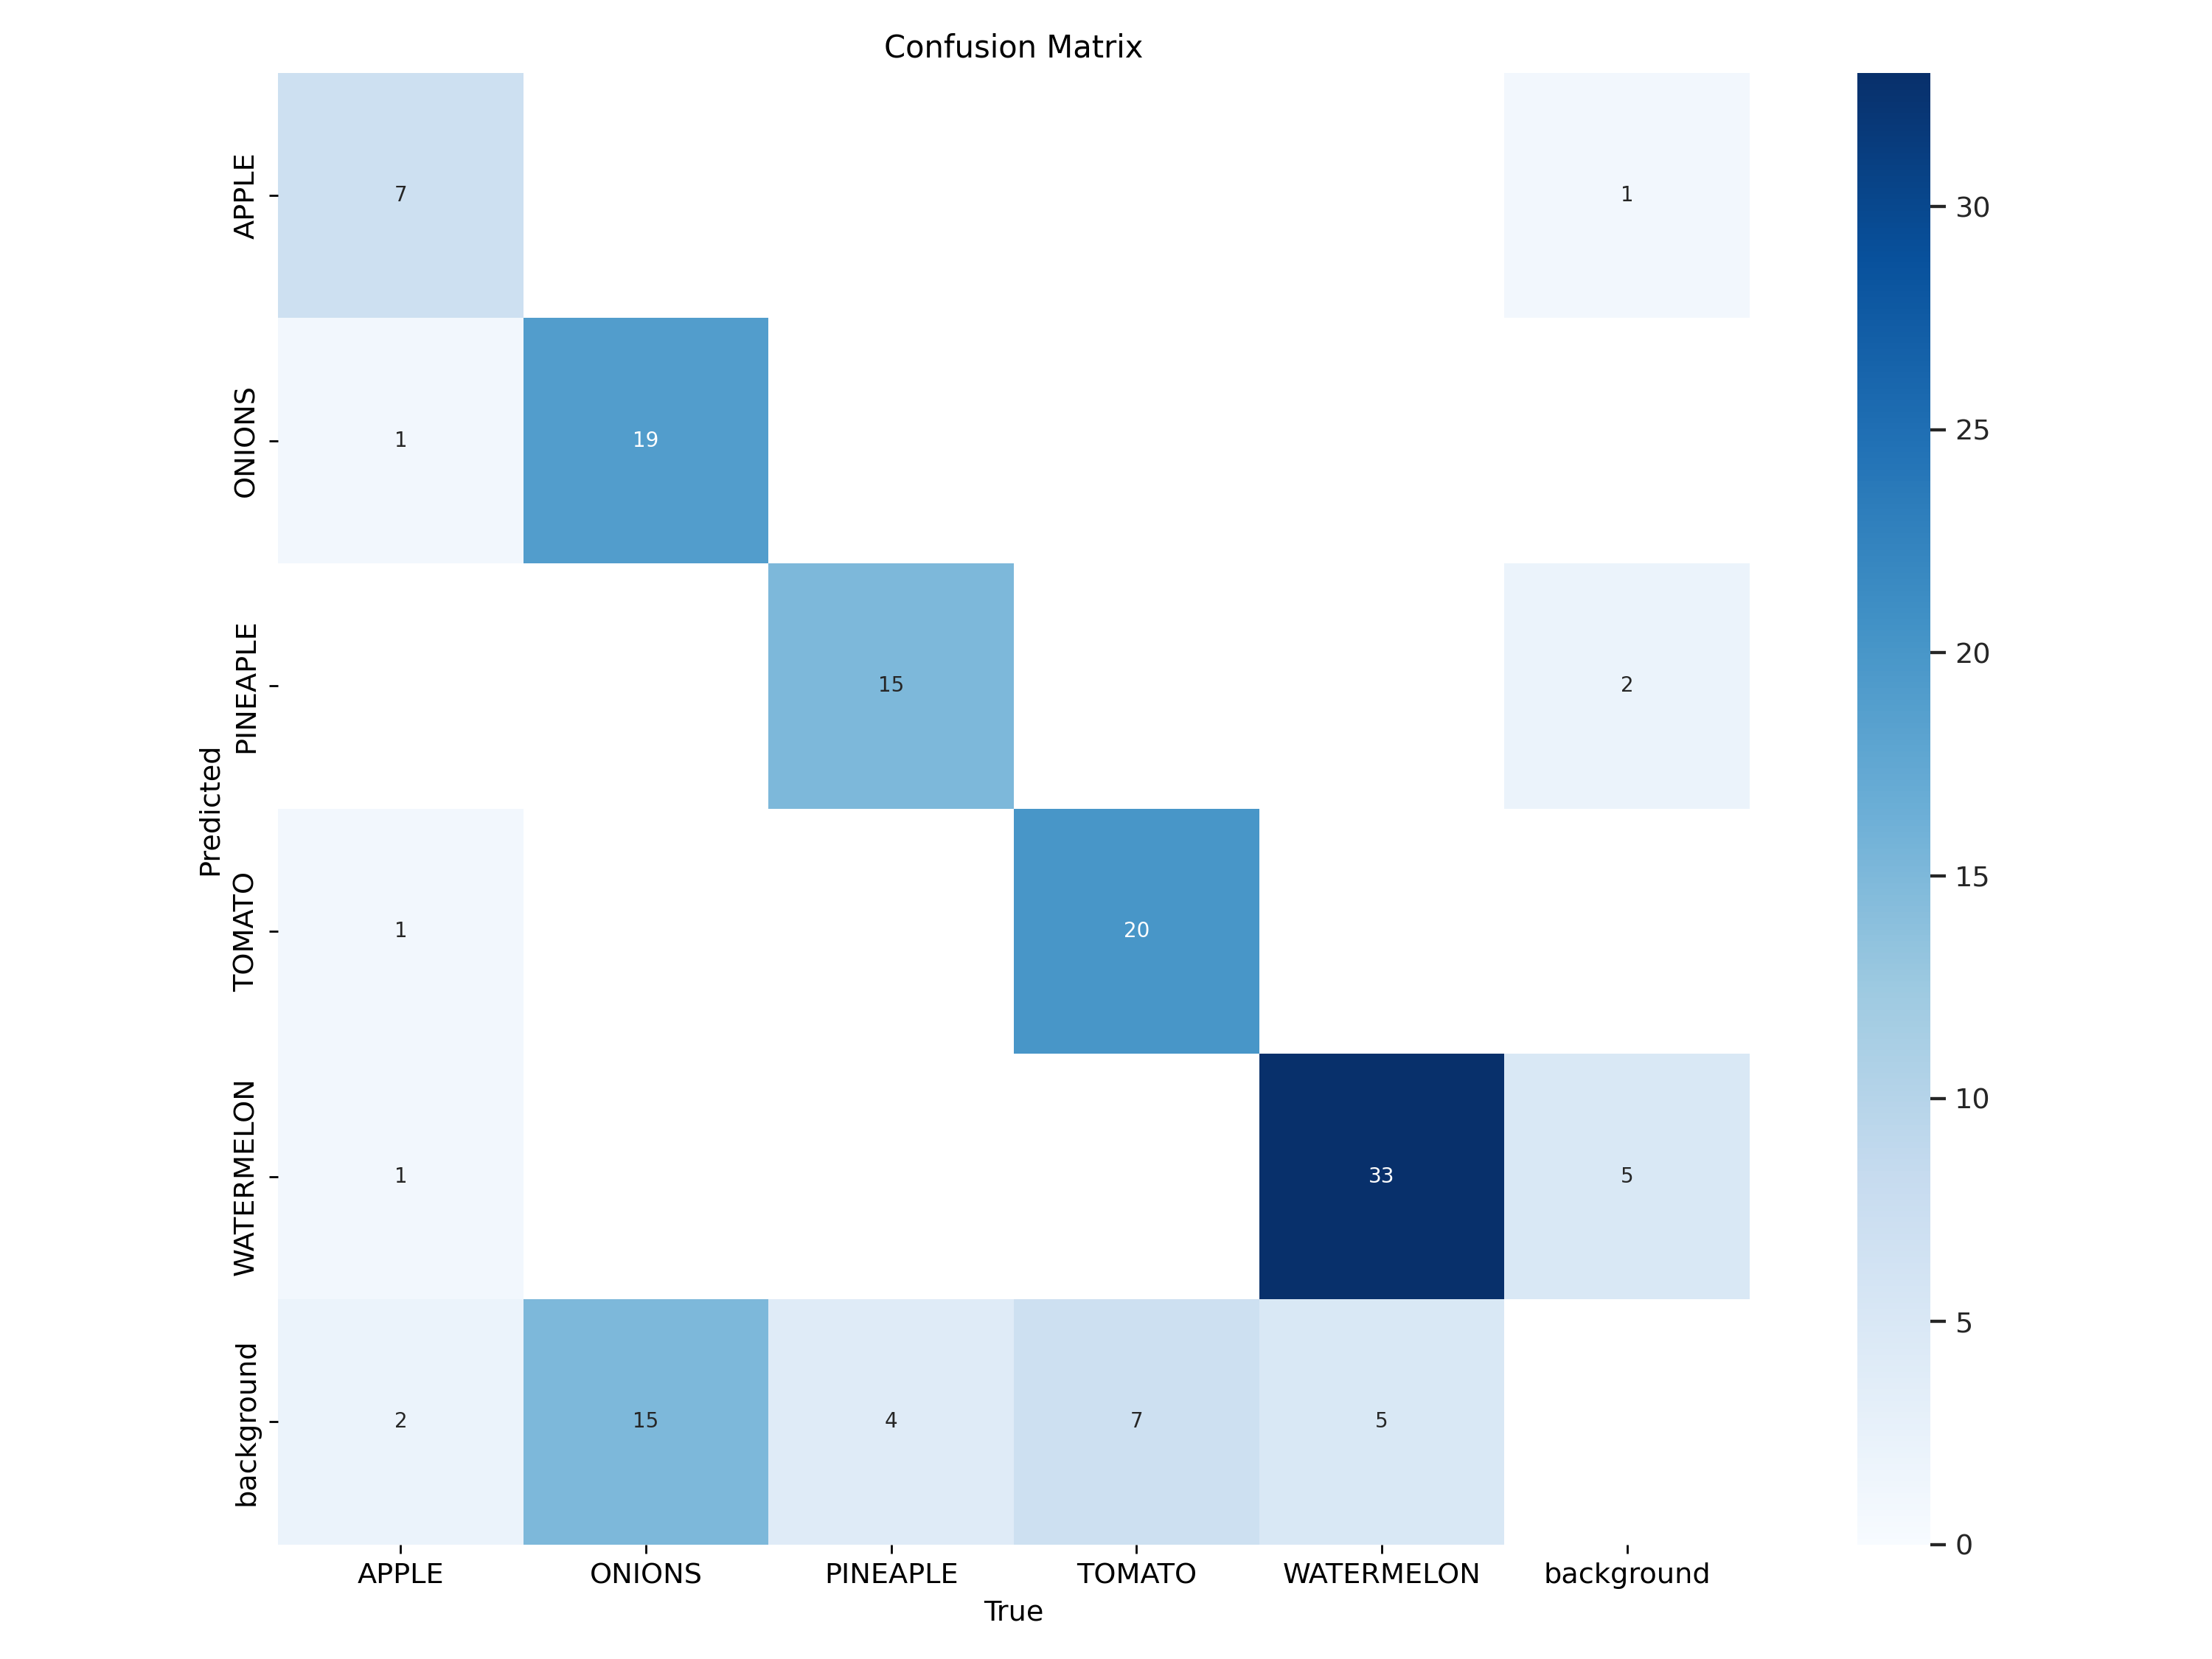

In [10]:
Image(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=600)

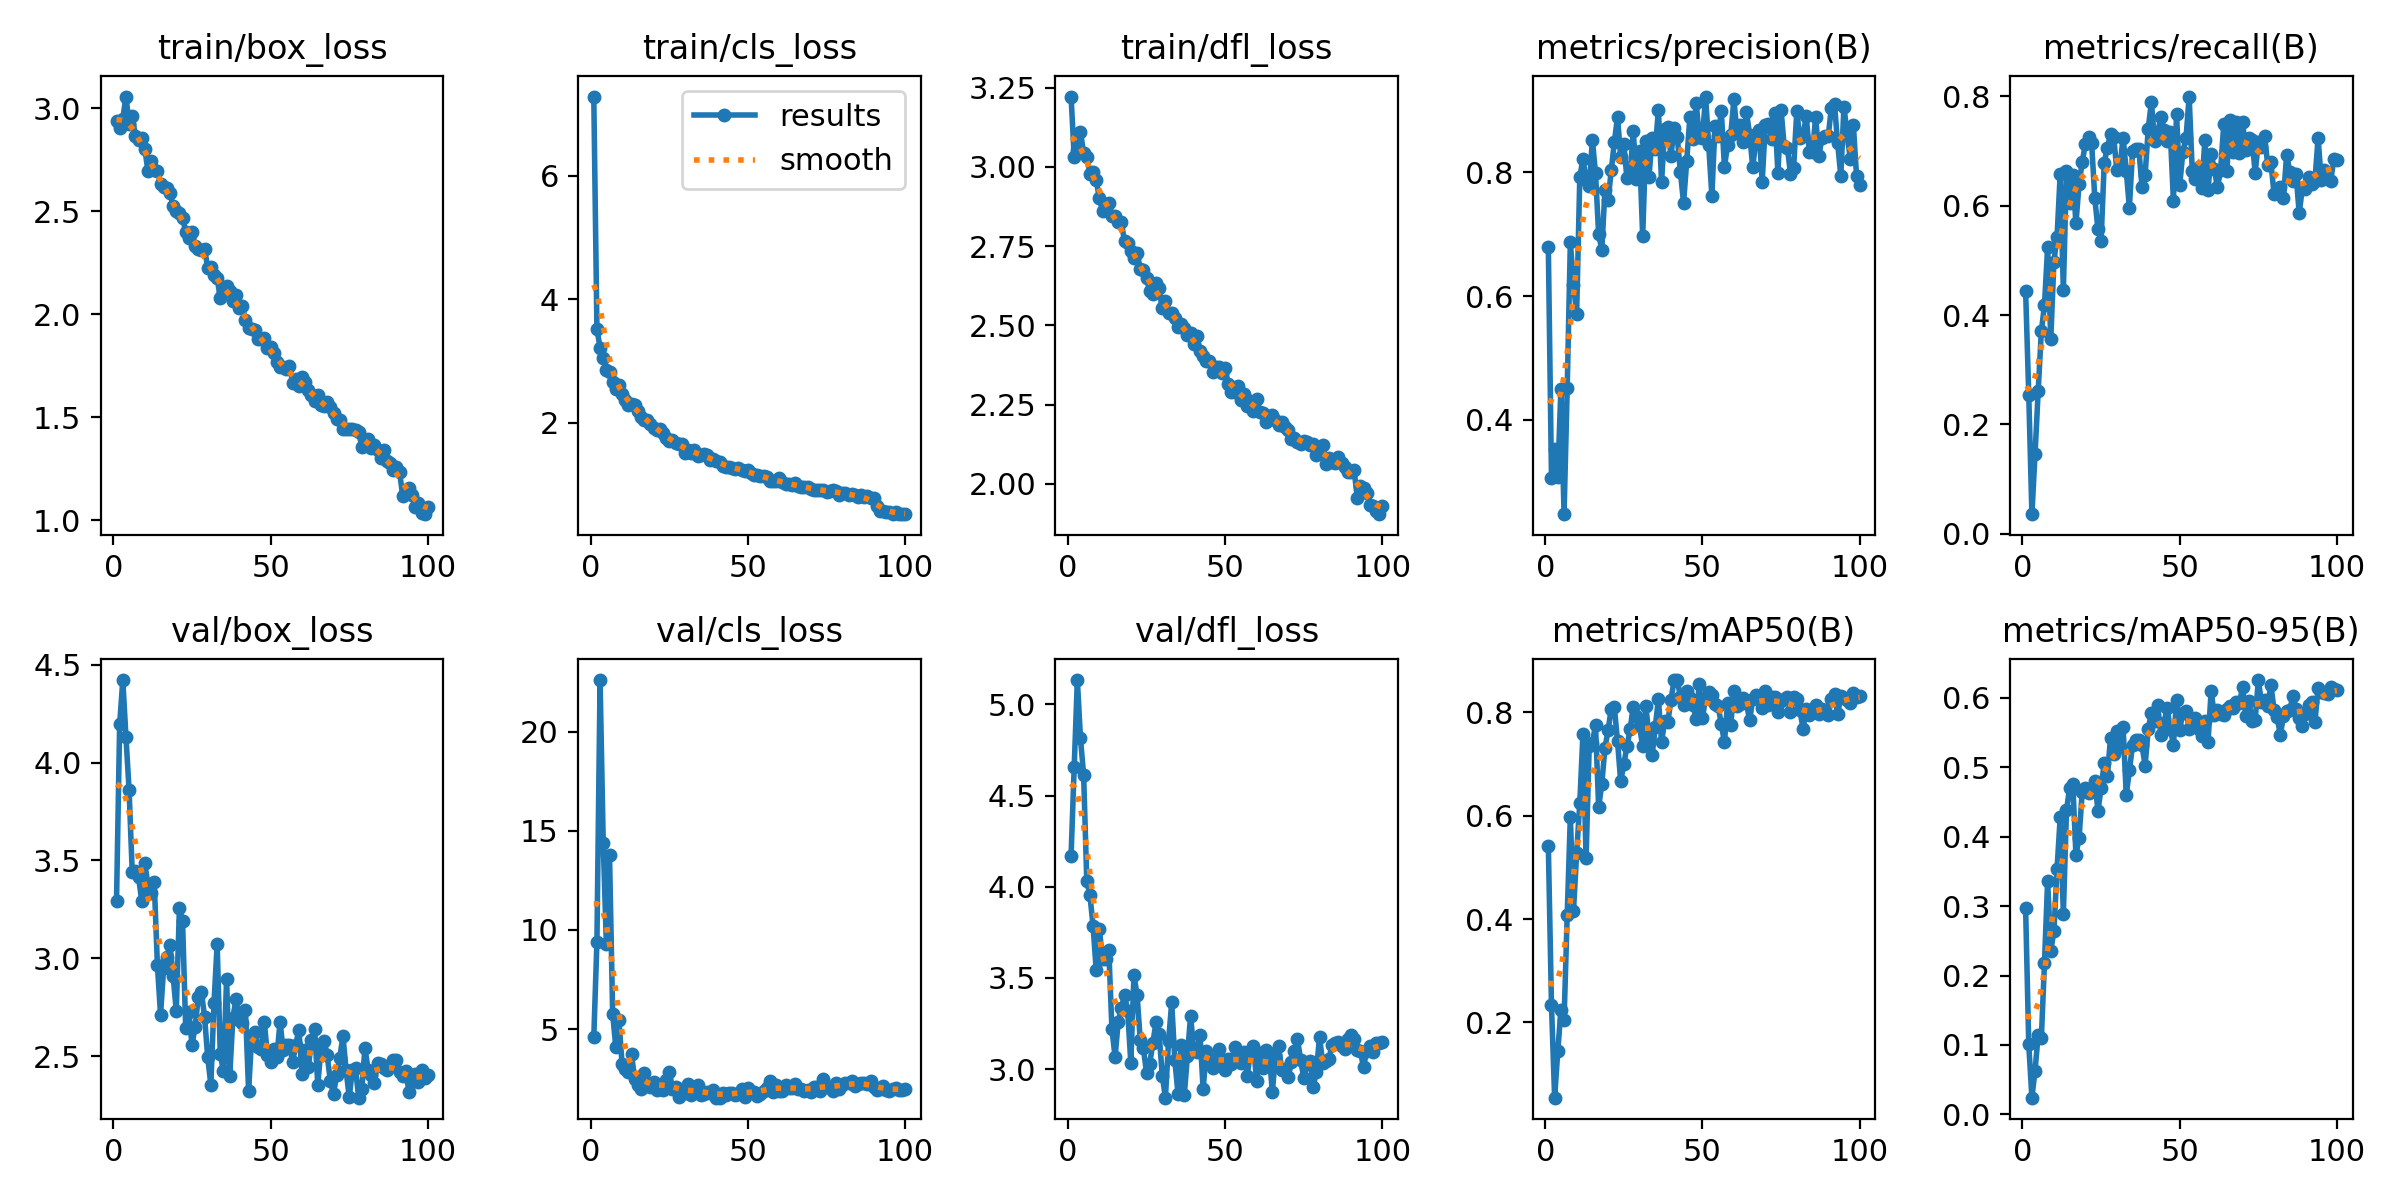

In [12]:
Image(filename=f'{HOME}/runs/detect/train/results.png', width=600)

## Inference with Custom Model

**NOTE:** Let's start by loading our newly trained model.

In [13]:
# Load the trained model
model = YOLO('/content/runs/detect/train/weights/best.pt')

# Validate the model
metrics = model.val()
print(metrics.box.map)  # mAP50-95

Ultralytics YOLOv8.2.81 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv10s summary (fused): 293 layers, 8,038,830 parameters, 0 gradients, 24.5 GFLOPs


val: Scanning /content/FRUIT-DETECTION-1/valid/labels.cache... 35 images, 0 backgrounds, 0 corrupt: 100%|██████████| 35/35 [00:00<?, ?it/s]
os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:03<00:00,  1.00s/it]


                   all         35        130      0.901      0.716      0.822      0.626
                 APPLE          7         12          1      0.702      0.995      0.861
                ONIONS          6         34      0.945      0.559      0.701      0.495
              PINEAPLE          8         19      0.814      0.737      0.738      0.511
                TOMATO          6         27      0.932      0.741      0.796      0.659
            WATERMELON          8         38      0.814      0.842      0.879      0.603
Speed: 0.5ms preprocess, 56.6ms inference, 0.0ms loss, 3.0ms postprocess per image
Results saved to runs/detect/val
0.6258002626705391


In [14]:
import supervision as sv

model = YOLO(f'{HOME}/runs/detect/train/weights/best.pt')

dataset = sv.DetectionDataset.from_yolo(
    images_directory_path=f"{dataset.location}/valid/images",
    annotations_directory_path=f"{dataset.location}/valid/labels",
    data_yaml_path=f"{dataset.location}/data.yaml"
)

bounding_box_annotator = sv.BoxAnnotator()
label_annotator = sv.LabelAnnotator()

**NOTE:** Let's randomly select an image from our validation set and visualize the results.


0: 640x640 3 TOMATOs, 17.7ms
Speed: 3.3ms preprocess, 17.7ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


SupervisionWarnings: images is deprecated: `DetectionDataset.images` property is deprecated and will be removed in `supervision-0.26.0`. Iterate with `for path, image, annotation in dataset:` instead.
SupervisionWarnings: images is deprecated: `DetectionDataset.images` property is deprecated and will be removed in `supervision-0.26.0`. Iterate with `for path, image, annotation in dataset:` instead.


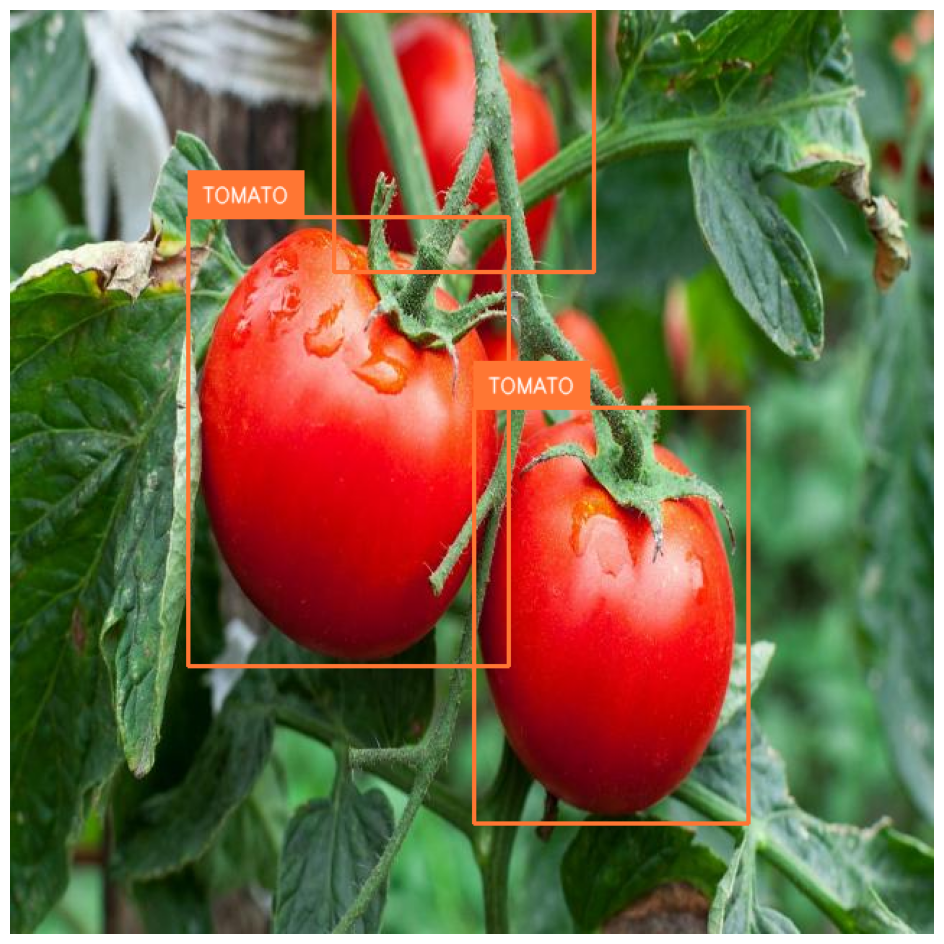

In [18]:
import random

random_image = random.choice(list(dataset.images.keys()))
random_image = dataset.images[random_image]

results = model(source=random_image, conf=0.25)[0]
detections = sv.Detections.from_ultralytics(results)

annotated_image = bounding_box_annotator.annotate(
    scene=random_image, detections=detections)
annotated_image = label_annotator.annotate(
    scene=annotated_image, detections=detections)

sv.plot_image(annotated_image)

In [16]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [17]:
import locale

locale.getpreferredencoding = lambda: "UTF-8"
!cp -r '/content/runs/detect' '/content/drive/MyDrive/Fruit-Detection'